<a href="https://colab.research.google.com/github/Tikquuss/meta_XLM/blob/master/notebooks/demo/tuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author : Pascal Tikeng (https://github.com/Tikquuss)**

https://github.com/Tikquuss/meta_XLM

**Make sure you have enabled the GPU.**

In [1]:
! git clone https://github.com/Tikquuss/meta_XLM

Cloning into 'meta_XLM'...
remote: Enumerating objects: 182, done.
remote: Counting objects: 100% (182/182), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 905 (delta 111), reused 103 (delta 53), pack-reused 723
Receiving objects: 100% (905/905), 33.11 MiB | 16.14 MiB/s, done.
Resolving deltas: 100% (505/505), done.


In [2]:
%cd meta_XLM

/content/meta_XLM


# **1.Download Text data**

## **1.1) From opus (de-fr)**  

In my case I changed ```PARA_PATH=/content/data/para``` to ```PARA_PATH=$PARA_PATH``` in ```opus.sh``` to be able to modify this parameter from the outside.

In [3]:
! mkdir /content/data

In [4]:
%env PARA_PATH=/content/data/para

env: PARA_PATH=/content/data/para


In [5]:
! chmod +x ./scripts/opus.sh

In [6]:
! ./scripts/opus.sh de-fr



***Download data and unzip it in /content/data/para/de-fr ***
--2020-08-30 17:20:18--  http://opus.nlpl.eu/download.php?f=OpenSubtitles2018%2Fde-fr.txt.zip
Resolving opus.nlpl.eu (opus.nlpl.eu)... 193.166.25.9
Connecting to opus.nlpl.eu (opus.nlpl.eu)|193.166.25.9|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/moses/de-fr.txt.zip [following]
--2020-08-30 17:20:18--  https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/moses/de-fr.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524297655 (500M) [application/zip]
Saving to: ‘/content/data/para/de-fr/download.php?f=OpenSubtitles2018%2Fde-fr.txt.zip’

download.php?f=Open 100%[===================>] 500.01M  84.0MB/s    in 6.2s    

2020-08-30 17:20:25 (81.1 MB/s) - ‘/content/data/para/de-

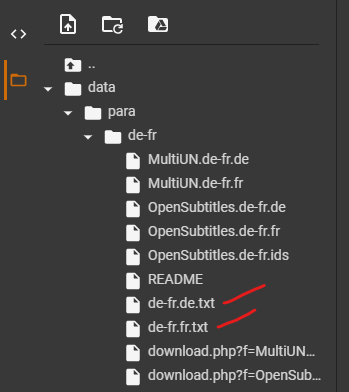

## **1.2) From anki (de-en and en-fr)**

In [7]:
%env output_path=/content/data/para

env: output_path=/content/data/para


In [8]:
! mkdir $output_path

mkdir: cannot create directory ‘/content/data/para’: File exists


In [9]:
! chmod +x ./scripts/anki.sh

In [10]:
! ./scripts/anki.sh de,en deu-eng $output_path scripts/anki.py
! ./scripts/anki.sh en,fr fra-eng $output_path scripts/anki.py

--2020-08-30 17:22:38--  http://www.manythings.org/anki/deu-eng.zip
Resolving www.manythings.org (www.manythings.org)... 172.67.173.198, 104.24.109.196, 104.24.108.196, ...
Connecting to www.manythings.org (www.manythings.org)|172.67.173.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8324970 (7.9M) [application/zip]
Saving to: ‘/content/data/para/deu-eng.zip’

deu-eng.zip         100%[===================>]   7.94M  6.35MB/s    in 1.2s    

2020-08-30 17:22:40 (6.35 MB/s) - ‘/content/data/para/deu-eng.zip’ saved [8324970/8324970]

Archive:  /content/data/para/deu-eng.zip
  inflating: /content/data/para/deu.txt  
  inflating: /content/data/para/_about.txt  
download and extract deu-eng data in /content/data/para
--2020-08-30 17:22:42--  http://www.manythings.org/anki/fra-eng.zip
Resolving www.manythings.org (www.manythings.org)... 104.24.108.196, 104.24.109.196, 172.67.173.198, ...
Connecting to www.manythings.org (www.manythings.org)|104.24.108.196|:80... c

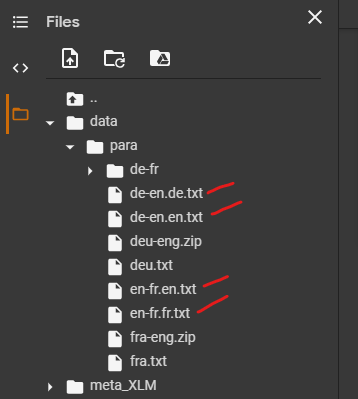

## **1.3) Put everything in the same folder**

In [11]:
! cp /content/data/para/de-fr/de-fr.de.txt /content/data/para
! cp /content/data/para/de-fr/de-fr.fr.txt /content/data/para

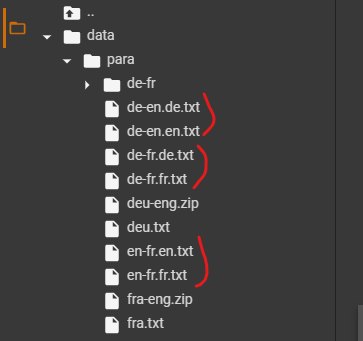

# **2. Preprocessing**

## **2.1) Move to the XLM folder in advance.**

In [12]:
% cd XLM

/content/meta_XLM/XLM


## **2.2) Install the following dependencies (fastBPE and Moses)**

In [13]:
! git clone https://github.com/moses-smt/mosesdecoder tools/mosesdecoder
! git clone https://github.com/glample/fastBPE tools/fastBPE && cd tools/fastBPE && g++ -std=c++11 -pthread -O3 fastBPE/main.cc -IfastBPE -o fast

Cloning into 'tools/mosesdecoder'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 147572 (delta 29), reused 21 (delta 9), pack-reused 147514
Receiving objects: 100% (147572/147572), 129.76 MiB | 21.69 MiB/s, done.
Resolving deltas: 100% (114015/114015), done.
Cloning into 'tools/fastBPE'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 59 (delta 0), reused 1 (delta 0), pack-reused 54
Unpacking objects: 100% (59/59), done.


## **2.3)**

**In my case I have set :**  
```
OUTPATH=$OUTPATH
PARA=$PARA
MONO=$MONO
PARA_PATH=$PARA_PATH
MONO_PATH=$MONO_PATH
add_para_data_to_mono_data=$add_para_data_to_mono_data
nCodes=$nCodes
n_samples=$n_samples
...
...
...
### option 2 : data in a same folder ###
chmod +x ../scripts/build_meta_data_monoxlm.sh
. ../scripts/build_meta_data_monoxlm.sh $sub_tasks $n_samples $add_para_data_to_mono_data
```  
**in  ```data.sh``` to be able to modify these parameters from the outside.**

In [14]:
%env OUTPATH=/content/processed
# I need monolingual data for TLM
%env PARA=True
# I need monolingual data for MLM
%env MONO=True
%env PARA_PATH=/content/data/para

# You can put any path to a folder that does not exist (otherwise there will be an error). 
# Since there are no files containing monolingual data, they will be created from the parallel data.
%env MONO_PATH=/content/blablablablabla

%env add_para_data_to_mono_data=False

# To be adapted to your data (If I had to use the whole dataset I would have set 30000-40000)
%env nCodes=20
# This notebook is for illustrative purposes only, so we are working with 100 peer examples.
%env n_samples=100

env: OUTPATH=/content/processed
env: PARA=True
env: MONO=True
env: PARA_PATH=/content/data/para
env: MONO_PATH=/content/blablablablabla
env: add_para_data_to_mono_data=False
env: nCodes=20
env: n_samples=100


In [15]:
%env languages=de,en,fr
! chmod +x ../data.sh 

env: languages=de,en,fr


In [ ]:
# In case of problems: you can do this before starting again
#! rm /content/data/para/*.all && rm /content/data/para/*.train && rm /content/data/para/*.test && rm /content/data/para/*.valid
#! rm /content/processed/bpe.train /content/processed/codes

In [16]:
! ../data.sh $languages

de-en:-1,de-fr:-1,en-fr:-1
Processed
params ok !
*** Cleaning and tokenizing de-en data ... ***
Tokenizer Version 1.1
Language: de
Number of threads: 16
*** Tokenized (+ lowercase + accent-removal) de-en.de data to /content/data/para/? ***
Tokenizer Version 1.1
Language: en
Number of threads: 16
*** Tokenized (+ lowercase + accent-removal) de-en.en data to /content/data/para/? ***
*** Cleaning and tokenizing de-fr data ... ***
Tokenizer Version 1.1
Language: de
Number of threads: 16
*** Tokenized (+ lowercase + accent-removal) de-fr.de data to /content/data/para/? ***
Tokenizer Version 1.1
Language: fr
Number of threads: 16
*** Tokenized (+ lowercase + accent-removal) de-fr.fr data to /content/data/para/? ***
*** Cleaning and tokenizing en-fr data ... ***
Tokenizer Version 1.1
Language: en
Number of threads: 16
*** Tokenized (+ lowercase + accent-removal) en-fr.en data to /content/data/para/? ***
Tokenizer Version 1.1
Language: fr
Number of threads: 16
*** Tokenized (+ lowercase + acce

In [61]:
# In case of problems: you can do this before starting again
#! rm -r /content/processed

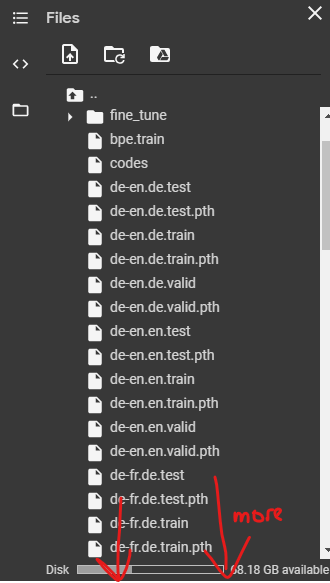

# **3) MLM+TLM**

I have set ```"epoch_size":"100","max_epoch":"1"``` just as an illustration. In a real case I would have put ```epoch_size=number of example in my training set``` and ```max_epoch=100``` for example.

In [17]:
%env config_file=../configs/lm_template.json

env: config_file=../configs/lm_template.json


In [18]:
! python train.py --config_file $config_file

FAISS library was not found.
FAISS not available. Switching to standard nearest neighbors search implementation.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : 1f36582deaaf
INFO - 08/30/20 17:26:20 - 0:00:00 - ============ Initialized logger ============
INFO - 08/30/20 17:26:20 - 0:00:00 - accumulate_gradients: 1
                                     ae_steps: []
                                     amp: -1
                                     asm: False
                                     asm_cutoffs: 8000,20000
                                     asm_div_value: 4.0
                                     attention_dropout: 0.1
                                     batch_size: 32
                                     beam_size: 1
                                     bptt: 256
      

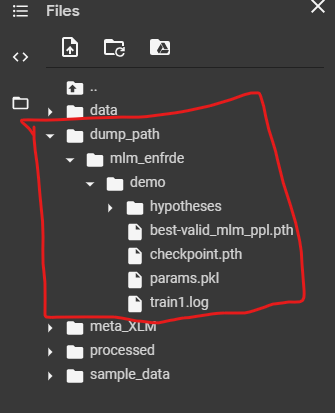

# **4) MT**  

**In my case the blue score must be negative or null because of all the limitations made (n_samples, epoch_size, max_epoch...)**

**My case**  
Because ```"ae_steps":""```, I set :
```
"word_shuffle":"0", 
"word_dropout":"0", 
"word_blank":"0",
```
I also set ```"remove_long_sentences_train":"True"``` to avoid this [error](https://discuss.pytorch.org/t/runtimeerror-cuda-error-device-side-assert-triggered/34213/3)

In [23]:
%env config_file=../configs/mt_template.json

env: config_file=../configs/mt_template.json


In [29]:
! python train.py --config_file $config_file

FAISS library was not found.
FAISS not available. Switching to standard nearest neighbors search implementation.
SLURM job: False
0 - Number of nodes: 1
0 - Node ID        : 0
0 - Local rank     : 0
0 - Global rank    : 0
0 - World size     : 1
0 - GPUs per node  : 1
0 - Master         : True
0 - Multi-node     : False
0 - Multi-GPU      : False
0 - Hostname       : 1f36582deaaf
INFO - 08/30/20 17:49:44 - 0:00:00 - ============ Initialized logger ============
INFO - 08/30/20 17:49:44 - 0:00:00 - accumulate_gradients: 1
                                     ae_steps: []
                                     amp: -1
                                     asm: False
                                     asm_cutoffs: 8000,20000
                                     asm_div_value: 4.0
                                     attention_dropout: 0.1
                                     batch_size: 32
                                     beam_size: 1
                                     bptt: 256
      